In [ ]:
%tensorflow_version 1.x
from keras.preprocessing import sequence
from keras.datasets import reuters

TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:

(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=20000)
x_train = sequence.pad_sequences(x_train,maxlen=80,padding='pre',truncating='pre')
x_test = sequence.pad_sequences(x_test,maxlen=80)



/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
import tensorflow.keras as keras
keras.datasets.reuters.get_word_index(path='reuters_word_index.json')

557056/550378 [==============================] - 0s 0us/step


{'mdbl': 10996,
 'fawc': 16260,
 'degussa': 12089,
 'woods': 8803,
 'hanging': 13796,
 'localized': 20672,
 'sation': 20673,
 'chanthaburi': 20675,
 'refunding': 10997,
 'hermann': 8804,
 'passsengers': 20676,
 'stipulate': 20677,
 'heublein': 8352,
 'screaming': 20713,
 'tcby': 16261,
 'four': 185,
 'grains': 1642,
 'broiler': 20680,
 'wooden': 12090,
 'wednesday': 1220,
 'highveld': 13797,
 'duffour': 7593,
 '0053': 20681,
 'elections': 3914,
 '270': 2563,
 '271': 3551,
 '272': 5113,
 '273': 3552,
 '274': 3400,
 'rudman': 7975,
 '276': 3401,
 '277': 3478,
 '278': 3632,
 '279': 4309,
 'dormancy': 9381,
 'errors': 7247,
 'deferred': 3086,
 'sptnd': 20683,
 'cooking': 8805,
 'stratabit': 20684,
 'designing': 16262,
 'metalurgicos': 20685,
 'databank': 13798,
 '300er': 20686,
 'shocks': 20687,
 'nawg': 7972,
 'tnta': 20688,
 'perforations': 20689,
 'affiliates': 2891,
 '27p': 20690,
 'ching': 16263,
 'china': 595,
 'wagyu': 16264,
 'affiliated': 3189,
 'chino': 16265,
 'chinh': 16266,
 '

In [ ]:
x_train.shape

(8982, 80)

In [ ]:
y_train.shape

(8982,)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,LSTM,GRU

model = Sequential()
model.add(Embedding(input_dim=20000,output_dim=128))
model.add(LSTM(32,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 2,580,641
Trainable params: 2,580,641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss ='binary_crossentropy',
              optimizer = 'sgd',
              metrics=['accuracy'])
model_data = model.fit(x_train,y_train,epochs=10,batch_size=50,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 8982 samples, validate on 2246 samples
Epoch 1/10
8982/8982 [==============================] - 13s 1ms/step - loss: -1603.1282 - accuracy: 0.0475 - val_loss: -3466.1293 - val_accuracy: 0.0467
Epoch 2/10
8982/8982 [==============================] - 13s 1ms/step - loss: -5286.2318 - accuracy: 0.0481 - val_loss: -7172.6757 - val_accuracy: 0.0467
Epoch 3/10
8982/8982 [==============================] - 13s 1ms/step - loss: -8979.6280 - accuracy: 0.0481 - val_loss: -10880.4318 - val_accuracy: 0.0467
Epoch 4/10
8982/8982 [==============================] - 13s 1ms/step - loss: -12674.1798 - accuracy: 0.0481 - val_loss: -14586.1506 - val_accuracy: 0.0467
Epoch 5/10
8982/8982 [==============================] - 13s 1ms/step - loss: -16366.8230 - accuracy: 0.0481 - val_loss: -18295.5035 - val_accuracy: 0.0467
Epoch 6/10
8982/8982 [==============================] - 13s 1ms/step - loss: -20063.0251

<function matplotlib.pyplot.show>

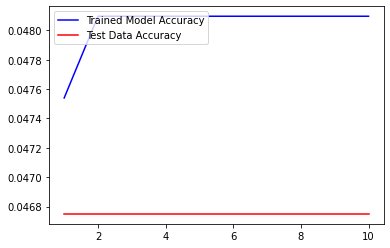

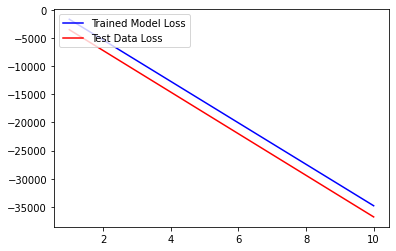

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1,len(model_data.history['accuracy'])+1)

plt.plot(epochs,model_data.history['accuracy'], 'b', label='Trained Model Accuracy')
plt.plot(epochs,model_data.history['val_accuracy'],'r',label='Test Data Accuracy')
plt.legend(loc='upper left')
plt.figure()

plt.plot(epochs,model_data.history['loss'],'b',label='Trained Model Loss')
plt.plot(epochs,model_data.history['val_loss'],'r',label='Test Data Loss')
plt.legend(loc='upper left')
plt.show

In [ ]:
#hyper param tuning for NN

#1. changing model
#2. changing activation function, layers
#3. number of epochs, batch_size

In [ ]:
#time to hyperparam previous model
from keras.layers import SimpleRNN, Dropout

max_words = 35000


(x_train,y_train),(x_test,y_test) = reuters.load_data(num_words=max_words)

x_train = sequence.pad_sequences(x_train,maxlen=300,padding='pre',truncating='pre')
x_test = sequence.pad_sequences(x_test,maxlen=300)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


hyperparamed_model = Sequential()

hyperparamed_model.add(Embedding(max_words,output_dim=100,input_length=300))
hyperparamed_model.add(SimpleRNN(32,return_sequences=True))
hyperparamed_model.add(SimpleRNN(32,return_sequences=True))
hyperparamed_model.add(SimpleRNN(32,return_sequences=True))
hyperparamed_model.add(LSTM(32,activation='tanh'))
hyperparamed_model.add(Dropout(rate=0.5))
hyperparamed_model.add(Dense(46,activation='softmax'))

/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.7/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
hyperparamed_model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model_2 = hyperparamed_model.fit(x_train,y_train,epochs=2,batch_size=500,validation_data=(x_test,y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/2
8982/8982 [==============================] - 26s 3ms/step - loss: 3.0929 - accuracy: 0.3114 - val_loss: 2.5621 - val_accuracy: 0.4902
Epoch 2/2
8982/8982 [==============================] - 25s 3ms/step - loss: 2.4764 - accuracy: 0.4712 - val_loss: 2.1611 - val_accuracy: 0.5093


In [ ]:
hyperparamed_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 100)          3500000   
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 300, 32)           4256      
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 300, 32)           2080      
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 300, 32)           2080      
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 46)               

In [ ]:
loss, accuracy = hyperparamed_model.evaluate(x_test,y_test)

2246/2246 [==============================] - 5s 2ms/step


In [ ]:
accuracy

0.5093499422073364

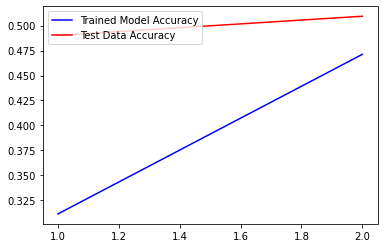

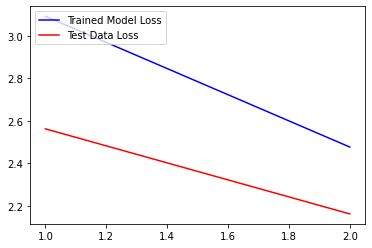

In [ ]:
epochs = range(1,len(model_2.history['accuracy'])+1)
plt.figure()
plt.plot(epochs, model_2.history['accuracy'],'b',label='Trained Model Accuracy')
plt.plot(epochs,model_2.history['val_accuracy'],'r',label='Test Data Accuracy')
plt.legend(loc='upper left')
plt.figure()

plt.plot(epochs,model_2.history['loss'],'b',label='Trained Model Loss')
plt.plot(epochs,model_2.history['val_loss'],'r',label='Test Data Loss')
plt.legend(loc='upper left')
plt.show()